In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


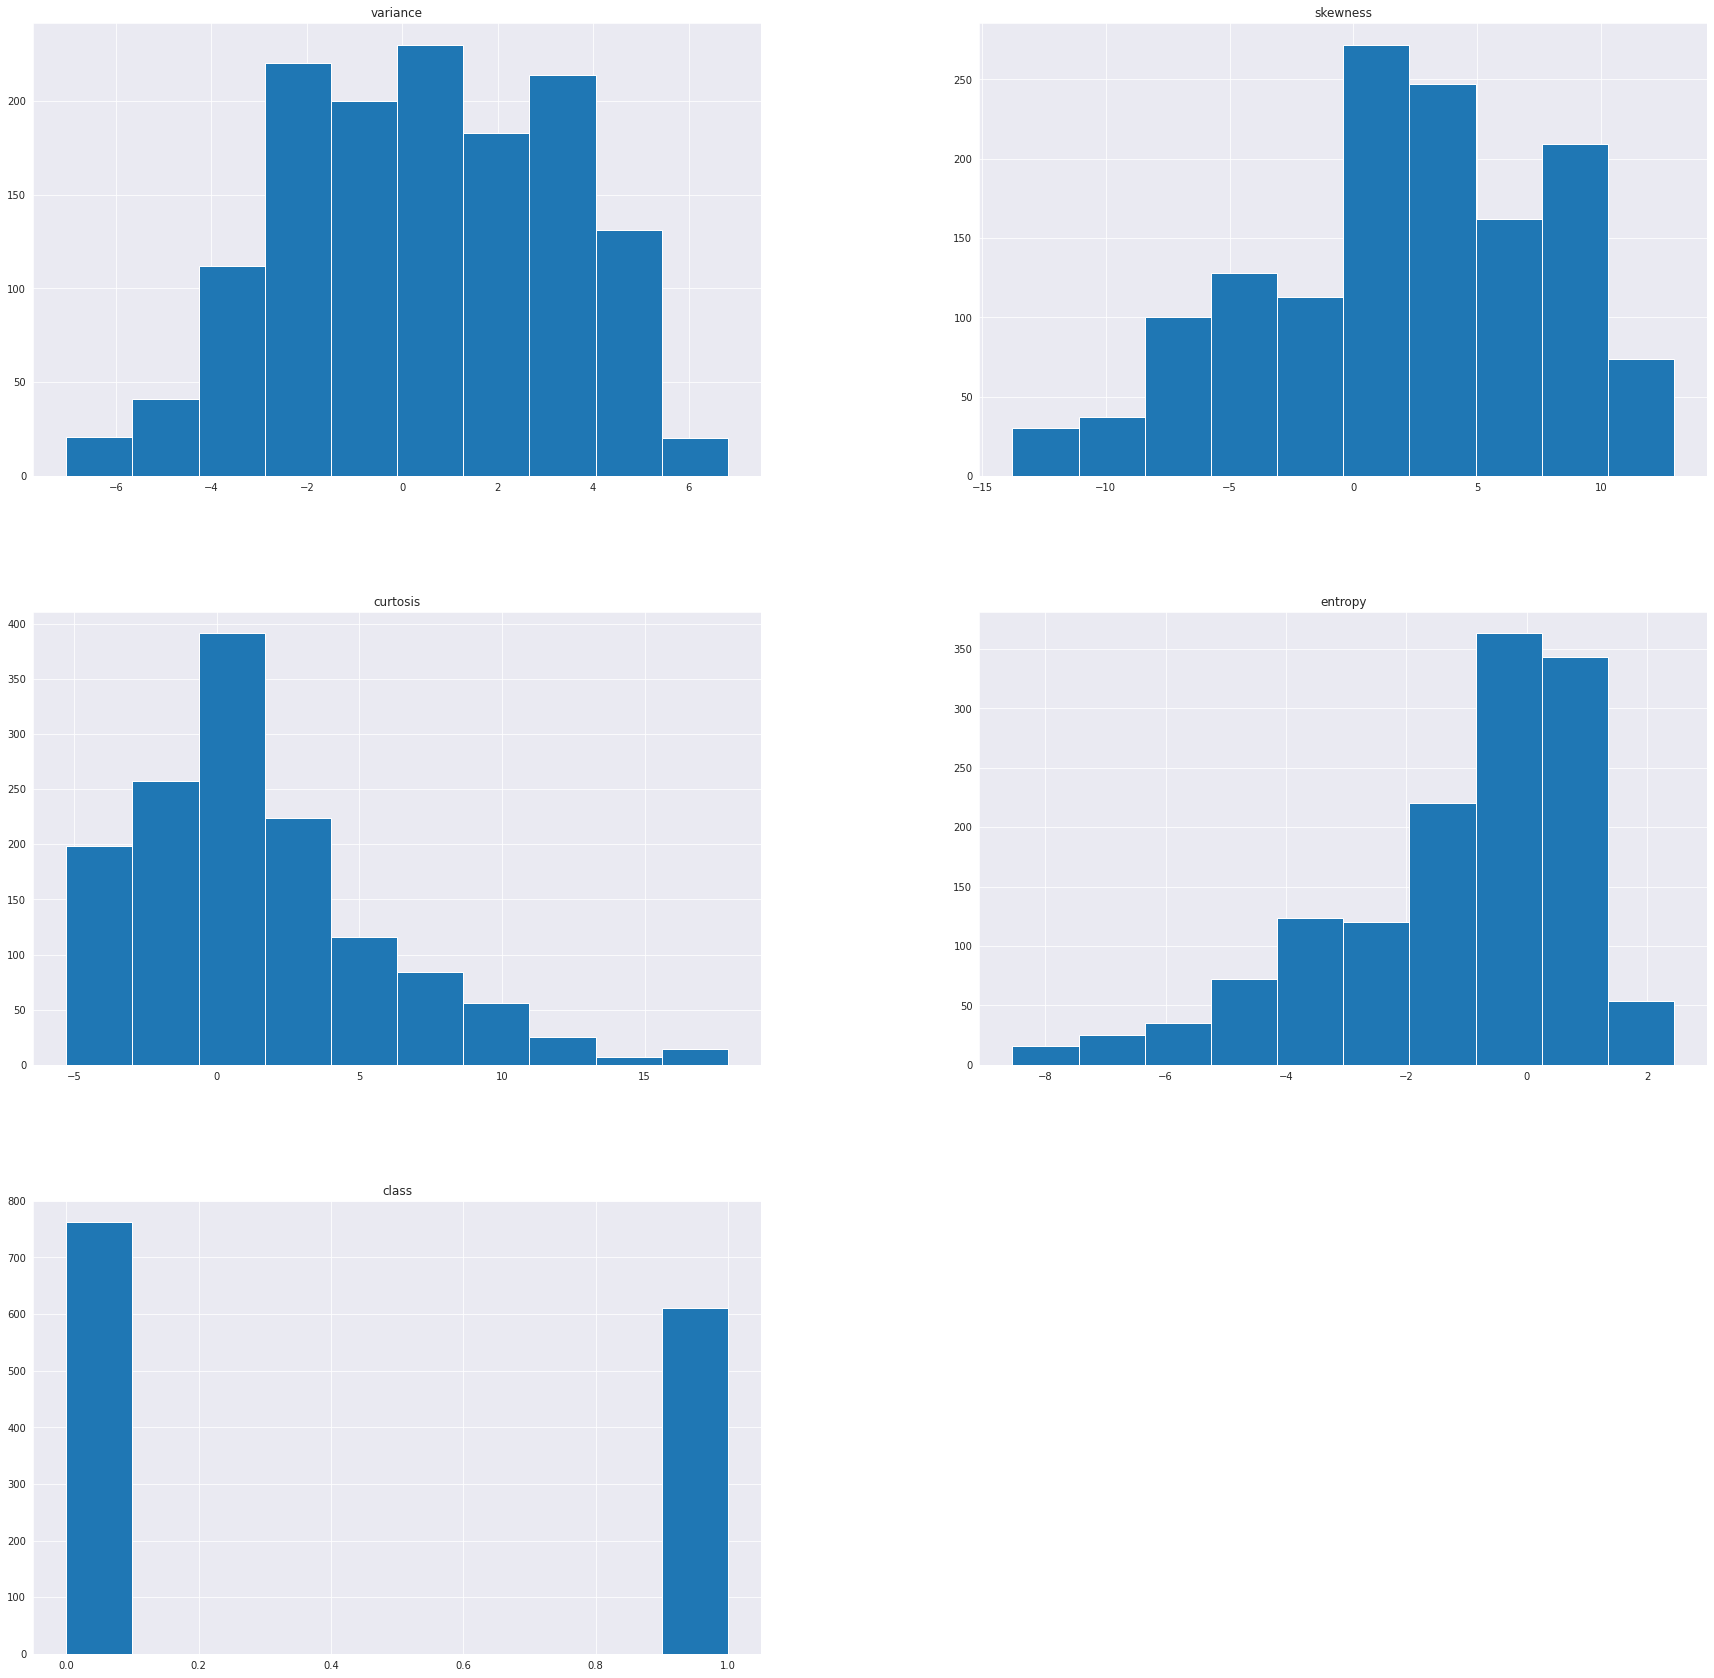

In [ ]:
# Plot histograms for each variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

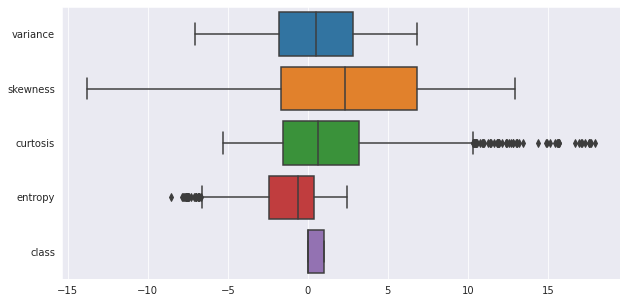

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,orient='h')

In [ ]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


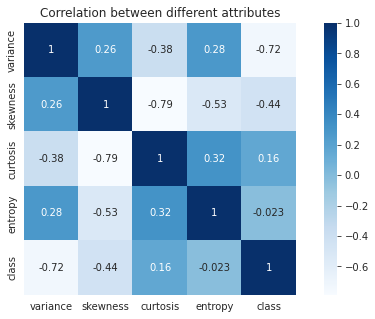

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

#RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
rf_score  = accuracy_score(y_pred,y_test)
print(rf_score)

0.9902912621359223


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
rf_f1 = f1_score(y_pred,y_test)
print(rf_f1)

rf_rec = recall_score(y_pred,y_test)
print(rf_rec)

rf_pre = precision_score(y_pred,y_test)
print(rf_pre)

0.9889502762430938
0.9835164835164835
0.9944444444444445


In [ ]:
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_test, y_pred):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1
# Print results
print(f"Results for classifier {type(classifier).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for classifier RandomForestClassifier
Correct: 408
Incorrect: 4
Accuracy: 99.03%


In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression 
kf=KFold(n_splits=5) 
score=cross_val_score(classifier,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.97916667 0.98958333 0.99479167 0.99479167 0.97916667]
Average Cross Validation score :0.9875


#LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lg_score = accuracy_score(y_pred,y_test)
print(lg_score)

0.9878640776699029


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
rf_f1 = f1_score(y_pred,y_test)
print(rf_f1)

rf_rec = recall_score(y_pred,y_test)
print(rf_rec)

rf_pre = precision_score(y_pred,y_test)
print(rf_pre)

0.9863013698630138
0.972972972972973
1.0


In [ ]:
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_test, y_pred):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1
# Print results
print(f"Results for lg {type(lg).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for lg LogisticRegression
Correct: 407
Incorrect: 5
Accuracy: 98.79%


In [ ]:
score=cross_val_score(lg,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.984375   0.97395833 0.984375   1.         1.        ]
Average Cross Validation score :0.9885416666666668


#DECISION TREE

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df2 = pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
x = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred,y_test)
print(dt_score)

0.9781553398058253


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
rf_f1 = f1_score(y_pred,y_test)
print(rf_f1)

rf_rec = recall_score(y_pred,y_test)
print(rf_rec)

rf_pre = precision_score(y_pred,y_test)
print(rf_pre)

0.9750692520775623
0.9723756906077348
0.9777777777777777


In [ ]:
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_test, y_pred):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1
# Print results
print(f"Results for dt {type(dt).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for dt DecisionTreeClassifier
Correct: 403
Incorrect: 9
Accuracy: 97.82%


In [ ]:
score=cross_val_score(dt,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96354167 0.98958333 0.99479167 1.         0.95833333]
Average Cross Validation score :0.98125


#NAIVE BAYES

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df4 = pd.read_csv('/content/BankNote_Authentication.csv')

In [ ]:
x = df4.iloc[:,:-1].values
y = df4.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
nb_score = accuracy_score(y_pred,y_test)
print(nb_score)

0.8325242718446602


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
rf_f1 = f1_score(y_pred,y_test)
print(rf_f1)

rf_rec = recall_score(y_pred,y_test)
print(rf_rec)

rf_pre = precision_score(y_pred,y_test)
print(rf_pre)

0.8067226890756303
0.8135593220338984
0.8


In [ ]:
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_test, y_pred):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1
# Print results
print(f"Results for nb {type(nb).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for nb GaussianNB
Correct: 343
Incorrect: 69
Accuracy: 83.25%


In [ ]:
score=cross_val_score(nb,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.85416667 0.828125   0.86979167 0.84895833 0.78645833]
Average Cross Validation score :0.8375


Text(0.5, 1.0, 'Classification Model Scores')

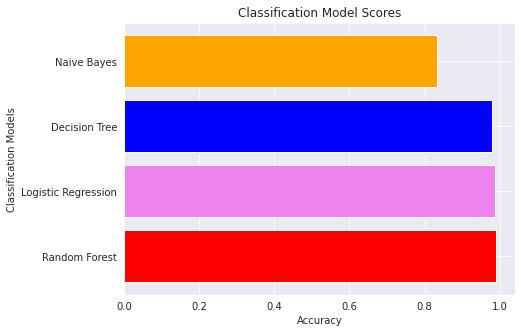

In [ ]:
import matplotlib.pyplot as plt
models=['Random Forest','Logistic Regression','Decision Tree','Naive Bayes']
accuracy=[rf_score,lg_score,dt_score,nb_score]

plt.figure(figsize=(7,5))
c = ['red', 'violet', 'blue','orange']
plt.barh(models,accuracy,align='center',color=c)

plt.xlabel("Accuracy")
plt.ylabel("Classification Models")
plt.title("Classification Model Scores")

In [ ]:
example_measures = [[3.62160,8.6661,2.8073,0.44699]]
prediction = classifier.predict(example_measures)
print(prediction)

[0]


In [ ]:
example_measures = [[0.3434,0.12415,-0.28733,0.14654]]
prediction = classifier.predict(example_measures)
print(prediction)

[1]
